In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
w_more_th = np.load('/path_to/weighted_more_thresholds.npy')
#f_matr = np.load('/path_to/connection_matrix.npy')

In [3]:
X = w_more_th[:,:-1]
y = w_more_th[:,-1]

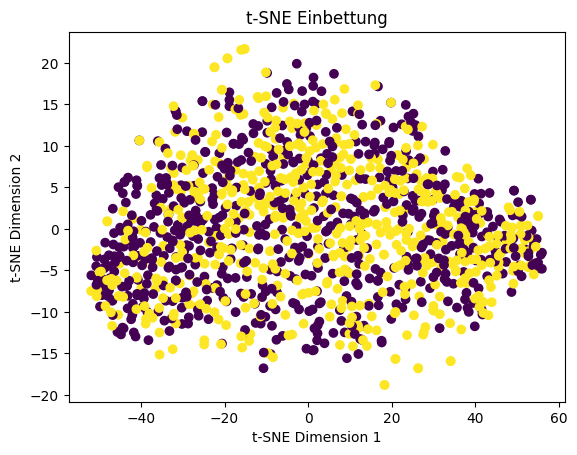

In [4]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = list(y))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Einbettung')
plt.show()

### graph learning

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
G = nx.Graph()
coordinates = {i + 1: tuple(coord) for i, coord in enumerate(X_tsne)}
class_array = y
for node, coord in coordinates.items():
    G.add_node(node, pos=coord)

In [21]:
biggest_weight = 107.91318938588871
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            class_u = class_array[u-1]  
            class_v = class_array[v-1]
            
            if class_u == class_v:  
                dist = ((coordinates[u][0] - coordinates[v][0])**2 + (coordinates[u][1] - coordinates[v][1])**2)**0.5
                if dist < 0.1*biggest_weight:
                    G.add_edge(u, v, weight=dist)

In [9]:
y[6]

1.0

In [13]:
len(G.edges())

43735

In [20]:
edges_with_weights = G.edges(data=True)

for edge in edges_with_weights:
    u, v, data = edge
    weight = data.get('weight')
    print(f"Kante ({u}, {v}) - Gewicht: {weight}")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




Kante (959, 1225) - Gewicht: 31.62511750610842
Kante (959, 1226) - Gewicht: 15.544487725895996
Kante (959, 1227) - Gewicht: 25.10178335386219
Kante (959, 1228) - Gewicht: 10.228912876605582
Kante (959, 1229) - Gewicht: 52.254443485800834
Kante (959, 1230) - Gewicht: 36.942930394080804
Kante (959, 1231) - Gewicht: 15.918797852182367
Kante (959, 1232) - Gewicht: 30.384213061279812
Kante (959, 1233) - Gewicht: 24.60488871742448
Kante (959, 1234) - Gewicht: 19.51043643894887
Kante (959, 1235) - Gewicht: 34.58237421415793
Kante (959, 1236) - Gewicht: 27.041131927094995
Kante (959, 1237) - Gewicht: 34.460928029925014
Kante (959, 1238) - Gewicht: 9.715324574637963
Kante (959, 1239) - Gewicht: 16.63529879826866
Kante (959, 1240) - Gewicht: 29.723266565879527
Kante (960, 961) - Gewicht: 55.672276689848026
Kante (960, 962) - Gewicht: 30.813428269048394
Kante (960, 963) - Gewicht: 67.53958114461417
Kante (960, 964) - Gewicht: 14.505677680312251
Kante (960, 965) - Gewicht: 20.774820753403972
Kant

In [22]:
pos = nx.get_node_attributes(G, 'pos')

In [23]:
def check_intersection(edge1, edge2, pos):
    x1, y1 = pos[edge1[0]]
    x2, y2 = pos[edge1[1]]
    x3, y3 = pos[edge2[0]]
    x4, y4 = pos[edge2[1]]

    if (edge1[0] == edge2[0] or edge1[0] == edge2[1] or
        edge1[1] == edge2[0] or edge1[1] == edge2[1]):
        return False

    det = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

    if det == 0: 
        return False

    intersection_x = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / det
    intersection_y = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / det

    if (min(x1, x2) <= intersection_x <= max(x1, x2) and
            min(y1, y2) <= intersection_y <= max(y1, y2) and
            min(x3, x4) <= intersection_x <= max(x3, x4) and
            min(y3, y4) <= intersection_y <= max(y3, y4)):
        return True

    return False

#for edge1 in G.edges():
#    for edge2 in G.edges():
#        if edge1 != edge2 and edge1[::-1] != edge2:  
#            if check_intersection(edge1, edge2, pos):
#                print(f"Die Kanten {edge1} und {edge2} schneiden sich.")

In [22]:
edges_to_remove = []
for num, edge1 in enumerate(G.edges()):
    for edge2 in G.edges():
        if edge1 != edge2 and edge1[::-1] != edge2: 
            if check_intersection(edge1, edge2, pos):
                length1 = ((pos[edge1[0]][0] - pos[edge1[1]][0])**2 + (pos[edge1[0]][1] - pos[edge1[1]][1])**2)**0.5
                length2 = ((pos[edge2[0]][0] - pos[edge2[1]][0])**2 + (pos[edge2[0]][1] - pos[edge2[1]][1])**2)**0.5
                
                if length1 > length2:
                    edges_to_remove.append(edge1)
                else:
                    edges_to_remove.append(edge2)
    print(f'----{num} Done!')
    
for edge in edges_to_remove:
    try:
        G.remove_edge(*edge)
    except:
        print(f'{edge} not in G anymore!')

# Zeige den bereinigten Graphen an
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color='black')
plt.show()

----0 Done!
----1 Done!
----2 Done!
----3 Done!


KeyboardInterrupt: 

In [24]:
from itertools import combinations
import math

n = len(G.edges())  # Gesamtanzahl der Elemente
k = 2   # Anzahl der auszuwählenden Elemente

num_komb = math.comb(n, k)
#len(list(combinations(G.edges(), 2)))

In [25]:
edges_to_remove = []

for i, (edge1, edge2) in enumerate(combinations(G.edges(), 2)):
    if edge1 != edge2 and edge1[::-1] != edge2:
        if check_intersection(edge1, edge2, pos):
            length1 = ((pos[edge1[0]][0] - pos[edge1[1]][0])**2 + (pos[edge1[0]][1] - pos[edge1[1]][1])**2)**0.5
            length2 = ((pos[edge2[0]][0] - pos[edge2[1]][0])**2 + (pos[edge2[0]][1] - pos[edge2[1]][1])**2)**0.5
            
            if length1 > length2:
                if edge1 not in edges_to_remove:
                    edges_to_remove.append(edge1)
            else:
                if edge2 not in edges_to_remove:
                    edges_to_remove.append(edge2)
                    
    if (i+1)%10000000==0:
        print(f'----{i+1} Done! {(i+1)/num_komb*100}%')
for edge in edges_to_remove:
    try:
        G.remove_edge(*edge)
    except:
        print(f'{edge} not in G anymore!')

----10000000 Done! 1.0456387378075975%
----20000000 Done! 2.091277475615195%
----30000000 Done! 3.1369162134227926%
----40000000 Done! 4.18255495123039%
----50000000 Done! 5.228193689037988%
----60000000 Done! 6.273832426845585%
----70000000 Done! 7.319471164653183%
----80000000 Done! 8.36510990246078%
----90000000 Done! 9.410748640268377%
----100000000 Done! 10.456387378075975%
----110000000 Done! 11.502026115883572%
----120000000 Done! 12.54766485369117%
----130000000 Done! 13.593303591498767%
----140000000 Done! 14.638942329306365%
----150000000 Done! 15.684581067113962%
----160000000 Done! 16.73021980492156%
----170000000 Done! 17.775858542729157%
----180000000 Done! 18.821497280536754%
----190000000 Done! 19.86713601834435%
----200000000 Done! 20.91277475615195%
----210000000 Done! 21.958413493959547%
----220000000 Done! 23.004052231767144%
----230000000 Done! 24.04969096957474%
----240000000 Done! 25.09532970738234%
----250000000 Done! 26.140968445189937%
----260000000 Done! 27.1

In [26]:
len(edges_to_remove)

41542

In [27]:
len(G.edges())

2193

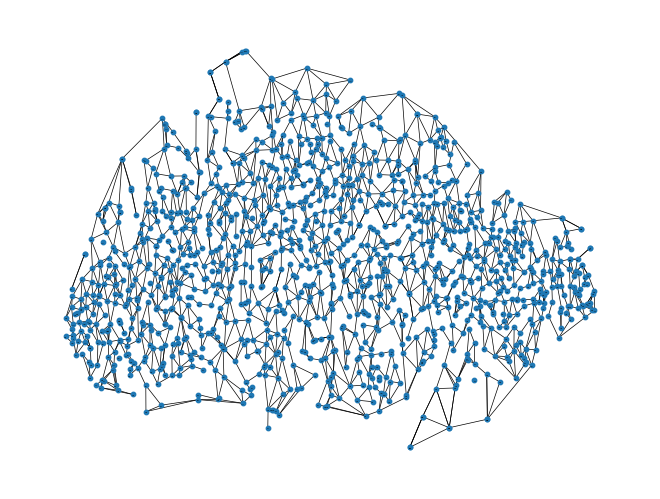

In [40]:
nx.draw(G, pos, with_labels=True, node_size=10, font_size=1, width=0.5, font_color='black')
plt.show()

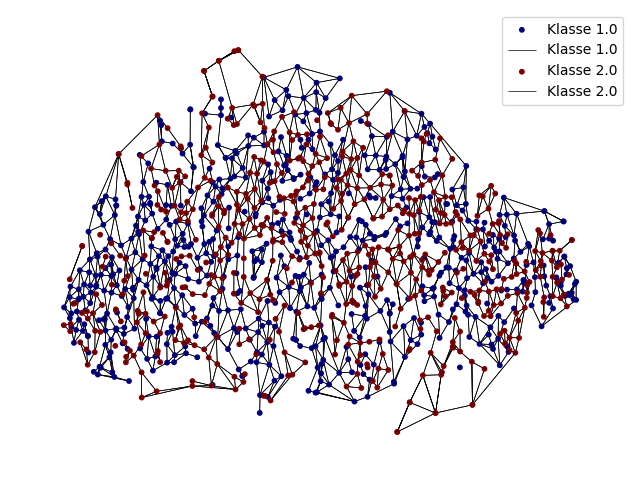

In [41]:
# create plot
plt.figure(figsize=(8, 6))
ax = plt.gca()
unique_classes = np.unique(class_array)

# create colors
class_colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))

# go through each node and color dependent on classes
for i, class_value in enumerate(unique_classes):
    nodes_in_class = np.where(class_array == class_value)[0]
    nodes_in_class += 1
    color = class_colors[i]
    
    nx.draw(
        G, pos, nodelist=nodes_in_class, ax=ax, width=0.5, #pos=nx.spring_layout(G)
        node_color=[color] * len(nodes_in_class), with_labels=True,
        label=f'Klasse {class_value}', node_size=10, font_size=1
    )

# show plot
plt.legend()
plt.show()

In [34]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [35]:
nodes_in_class

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,  104,
        105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
        127,  128,  129,  130,  131,  132,  133,  134,  135,  157,  158,
        159,  160,  161,  162,  163,  164,  165,  166,  167,  168,  169,
        170,  171,  172,  173,  174,  175,  176,  177,  178,  179,  180,
        181,  182,  183,  184,  185,  186,  187,  188,  218,  219,  220,
        221,  222,  223,  224,  225,  226,  227,  228,  229,  230,  231,
        232,  233,  234,  235,  250,  251,  252,  253,  254,  255,  256,
        257,  258,  259,  260,  261,  262,  263,  2

In [1]:
num_components = nx.number_connected_components(G)

print("number of components:", num_components)

number of components: 68


In [76]:
X_tsne[800,:]

array([27.942064 , -3.8404663], dtype=float32)

In [77]:
y[800]

2.0

In [78]:
new_point = (28,-4)

In [57]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def determine_class(new_point, G, node_classes):
    min_distance = float('inf')
    closest_edge_class = None
    
    for edge in G.edges():
        u, v = edge
        distance = compute_shortest_length_to_edge(G,new_point,u,v)
        if distance < min_distance:
            min_distance = distance
            closest_edge_class = node_classes[u-1] 
    return closest_edge_class

# compute angle
def calculate_angle(side_a, side_b, side_c):
    return math.acos((side_a**2 + side_b**2 - side_c**2) / (2 * side_a * side_b))

def compute_shortest_length_to_edge(G,new_point,u,v):
    
    point1 = G.nodes[u]['pos']
    point2 = G.nodes[v]['pos']
    
    side_y = math.dist(point2, new_point)
    side_z = math.dist(point1, new_point)
    side_x = math.dist(point1, point2)

    angle_B = calculate_angle(side_z, side_x, side_y)
    angle_C = calculate_angle(side_y, side_x, side_z)
    angle_A = calculate_angle(side_y, side_z, side_x)

    if math.degrees(angle_A)<90 and math.degrees(angle_B)<90 and math.degrees(angle_C)<90:
        min_distance = math.sin(angle_B)*side_z
        #min_distance = math.sin(angle_C)*side_y
    else:
        if side_y < side_z:
            min_distance = side_y
        else:
            min_distance = side_z
    return min_distance

In [65]:
class_array.shape

(1240,)